In [0]:
from google.colab import files

In [0]:
files.upload()

Saving kicks_(2009-2018[not 2010]).csv to kicks_(2009-2018[not 2010]).csv


{'kicks_(2009-2018[not 2010]).csv': b',Total Yards,Made,Quarter,Time,Down,Kicker id,Kicker Name,Kicking Team,Weather_Condition,Humidity,Temperature,Wind,Stadium,Grass Type,Stadium Type\n0,37,0,1,06:48,4,00-0020962,R.Bironas,TEN,Mostly Cloudy,55,67,,Heinz Field,Desso Grassmaster,Open\n1,45,1,4,11:08,4,00-0020962,R.Bironas,TEN,Mostly Cloudy,55,67,,Heinz Field,Desso Grassmaster,Open\n2,32,1,4,03:00,4,00-0020737,J.Reed,PIT,Mostly Cloudy,55,67,,Heinz Field,Desso Grassmaster,Open\n3,33,1,5,10:34,1,00-0020737,J.Reed,PIT,Mostly Cloudy,55,67,,Heinz Field,Desso Grassmaster,Open\n4,42,0,1,09:31,4,00-0004811,J.Elam,ATL,Overcast,69,75,,Georgia Dome,Fieldturf,Dome\n5,36,1,2,00:36,4,00-0004811,J.Elam,ATL,Overcast,69,75,,Georgia Dome,Fieldturf,Dome\n6,38,0,4,12:25,4,00-0004811,J.Elam,ATL,Overcast,69,75,,Georgia Dome,Fieldturf,Dome\n7,50,1,4,07:38,4,00-0004811,J.Elam,ATL,Overcast,69,75,,Georgia Dome,Fieldturf,Dome\n8,44,1,1,10:23,4,00-0025944,S.Hauschka,BAL,Mostly Cloudy,85,68,,M&T Bank Stadium,419 Tif

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('kicks_(2009-2018[not 2010]).csv',index_col=0)

In [0]:
df

,Total Yards,Made,Quarter,Time,Down,Kicker id,Kicker Name,Kicking Team,Weather_Condition,Humidity,Temperature,Wind,Stadium,Grass Type,Stadium Type
0,37,0,1,06:48,4,00-0020962,R.Bironas,TEN,Mostly Cloudy,55.0,67,NaN,Heinz Field,Desso Grassmaster,Open
1,45,1,4,11:08,4,00-0020962,R.Bironas,TEN,Mostly Cloudy,55.0,67,NaN,Heinz Field,Desso Grassmaster,Open
2,32,1,4,03:00,4,00-0020737,J.Reed,PIT,Mostly Cloudy,55.0,67,NaN,Heinz Field,Desso Grassmaster,Open
3,33,1,5,10:34,1,00-0020737,J.Reed,PIT,Mostly Cloudy,55.0,67,NaN,Heinz Field,Desso Grassmaster,Open
4,42,0,1,09:31,4,00-0004811,J.Elam,ATL,Overcast,69.0,75,NaN,Georgia Dome,Fieldturf,Dome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,36,1,1,07:25,4,00-0033862,Z.Gonzalez,ARI,Mostly Cloudy,77.0,45,3.0,CenturyLink Field,Fieldturf,Open
871,50,1,2,01:18,4,00-0033862,Z.Gonzalez,ARI,Mostly Cloudy,76.0,46,2.0,CenturyLink Field,Fieldturf,Open
872,42,1,4,06:25,4,00-0019646,S.Janikowski,SEA,Mostly Cloudy,73.0,46,0.0,CenturyLink Field,Fieldturf,Open
873,55,1,4,01:54,4,00-0033862,Z.Gonzalez,ARI,Mostly Cloudy,73.0,46,0.0,CenturyLink Field,Fieldturf,Open


In [0]:
df['Grass Type'].value_counts()

Grass                                           2765
Fieldturf                                       2370
419 Tifway Bermuda Grass                         798
Desso GrassMaster                                587
Kentucky Bluegrass                               320
-                                                272
Desso Grassmaster                                270
RealGrass Matrix                                 266
Bluegrass                                        262
A-Turf Titan                                     249
Bermuda Bandera / Perennial Ryegrass mixture     143
Natural grass                                     80
UBU Sports Speed Series S5-M                      76
FieldTurf                                         74
FieldTurf Revolution 360                          62
grass                                              4
Name: Grass Type, dtype: int64

In [0]:
a=(df['Grass Type']=="Grass")| (df['Grass Type']=="grass") | (df['Grass Type']=="Natural grass")

In [0]:
df['Stadium Type'].value_counts()

Open    6874
Dome    1724
Name: Stadium Type, dtype: int64

In [0]:
df['Weather_Condition'].value_counts()

Clear                      1806
Mostly Cloudy              1612
Partly Cloudy              1362
Fair                       1184
Overcast                   1015
                           ... 
Few Clouds                    2
Chance Showers                2
Blowing Snow and Breezy       1
Light Rain and Breezy         1
Breezy and Humid              1
Name: Weather_Condition, Length: 75, dtype: int64

In [0]:
df['Wind'].describe()

count    6685.000000
mean        5.525056
std         3.978417
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        24.000000
Name: Wind, dtype: float64

In [0]:
pd.to_numeric(df['Temperature'],errors='coerce')

0      67.0
1      67.0
2      67.0
3      67.0
4      75.0
       ... 
870    45.0
871    46.0
872    46.0
873    46.0
874    46.0
Name: Temperature, Length: 8598, dtype: float64

# Selecting vars


In [0]:
x=pd.DataFrame()

In [0]:
x['Yards']=df['Total Yards']

In [0]:
x['Temperature']=(pd.to_numeric(df['Temperature'],errors='coerce')<50).astype(int)

In [0]:
x['Natural Grass']=((df['Grass Type']=="Grass")| (df['Grass Type']=="grass") | (df['Grass Type']=="Natural grass")).astype(int)

In [0]:
x['Stadium_Type']=(df['Stadium Type']=="Open").astype(int)

In [0]:
x['Humidity']=(df['Humidity']>60).astype(int)

In [0]:
x['Wind']=(df['Wind']>10).astype(int)

# Some plots

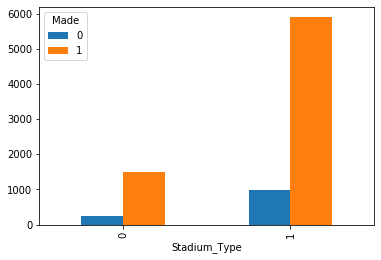

In [0]:
import matplotlib.pyplot as plt
pd.crosstab(x['Stadium_Type'],x['Made']).plot(kind='bar')

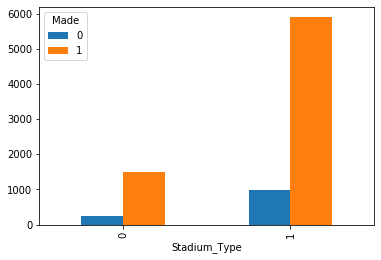

In [0]:
pd.crosstab(x['Stadium_Type'],x['Made']).plot(kind='bar')

# Model


In [0]:
y=df['Made']

In [0]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.446498
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.093   
Dependent Variable: Made             AIC:              7689.9852
Date:               2020-01-12 14:49 BIC:              7732.3409
No. Observations:   8598             Log-Likelihood:   -3839.0  
Df Model:           5                LL-Null:          -3511.3  
Df Residuals:       8592             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Yards           0.0119    0.0014   8.3640  0.0000  0.0091  0.0146
Temperature     0.2897    0.0690   4.1953  0.0000  0.1543  0.4250
Natural 

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluation

In [0]:
y_test.value_counts()

1    1890
0     260
Name: Made, dtype: int64

In [0]:
y_pred = logreg.predict(X_test)
print(logreg.score(X_test,y_test))

0.8823255813953489


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  17  243]
 [  10 1880]]


In [0]:
import numpy as np
logreg.predict_proba(X=np.reshape([10,1,0,1,1,0],(1,-1)))[0][1]

0.9943486473680216

# Prediction

In [0]:
import numpy as np
def predict(model,yards,temp,natural_grass,stadium_type,hum,wind):
  x=np.reshape([yards,int(temp<50),natural_grass,stadium_type,int(hum>60),int(wind>10)])
  return model.predict_proba(X=x)

# Saving the Model

In [55]:
import joblib
joblib.dump(logreg,"kicks_model.joblib")

['kicks_model.joblib']